# Generating Obsplans Automatically

In progress

## Step 1: Generate Airmass Grid

Note that the airmass values depend on temperature, pressure, and humidity at CTIO. The default location uses fiducial values of relative humidity = 0.5, temperature = 5 degrees Celsius, and pressure = 780 mbar, but these values should be updated and airmass grid recalculated at different times of the year.

In [1]:
from decat_obsplan_generator import AirmassCalculator

ac = AirmassCalculator()
ac.generate_airmass_grid()

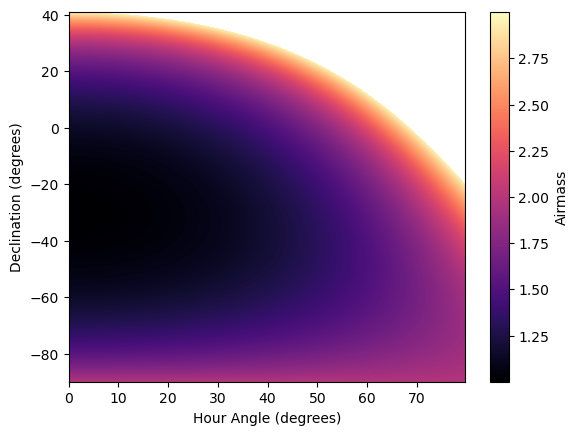

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# plot 2d airmass grid
airmass_grid = ac.load_airmass_grid()
airmass_grid.loc[airmass_grid.airmass > 3.0, 'airmass'] = np.nan
pivot_table = airmass_grid.pivot(index='dec', columns='ha', values='airmass')
x_min, x_max = airmass_grid['ha'].min(), airmass_grid['ha'].max()
y_min, y_max = airmass_grid['dec'].min(), airmass_grid['dec'].max()

plt.imshow(
    pivot_table, cmap='magma', origin='lower',
    aspect='auto', extent=(x_min, x_max + 1, y_min, y_max + 1)
)
plt.colorbar(label='Airmass')  # Optional: Add a colorbar
plt.xlabel('Hour Angle (degrees)')
plt.ylabel('Declination (degrees)')
plt.show()

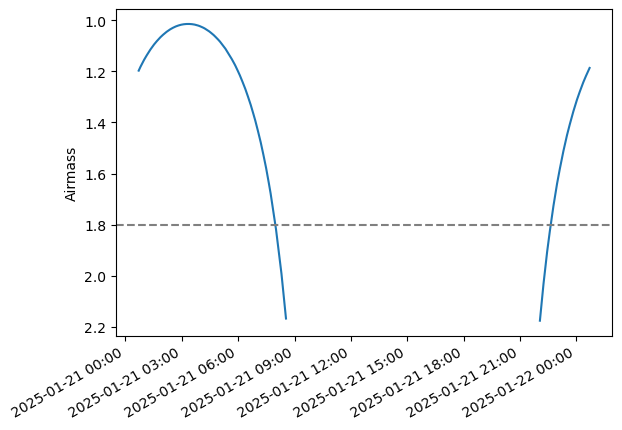

In [3]:
# generate airmass plot for random RA/dec
import astropy.units as u

fig, ax = plt.subplots()
ra_test = 100. * u.deg
dec_test = -40 * u.deg
ac.plot_airmass(fig, ax, ra_test, dec_test)
plt.show()

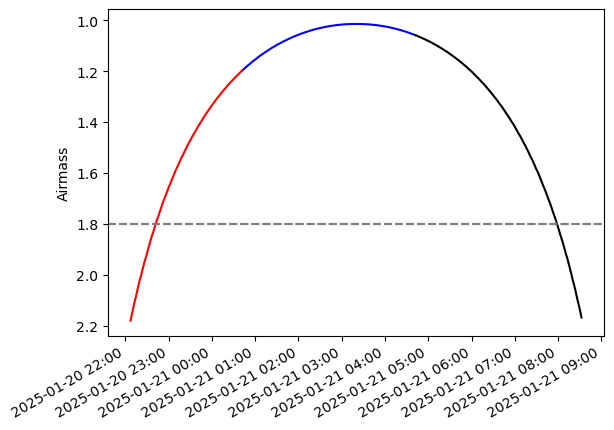

In [4]:
# case 2: specific time ranges
from astropy.time import Time

fig, ax = plt.subplots()
ra_test = 100. * u.deg
dec_test = -40 * u.deg

times1 = Time.now() + np.linspace(0, 4.0, num=100) * u.hour
times2 = Time.now() + np.linspace(4.0, 8.0, num=100) * u.hour
times3 = Time.now() + np.linspace(-4.0, 0.0, num=100) * u.hour

ac.plot_airmass(fig, ax, ra_test, dec_test, times=times1, color='blue')
ac.plot_airmass(fig, ax, ra_test, dec_test, times=times2, color='black')
ac.plot_airmass(fig, ax, ra_test, dec_test, times=times3, color='red')
plt.show()
